# Laboratorio # 1

### Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [91]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Este código importa las bibliotecas necesarias para el análisis de datos:
- `pandas` (alias `pd`): Para manipulación y análisis de datos estructurados.
- `matplotlib.pyplot` (alias `plt`): Para crear visualizaciones estáticas, animadas e interactivas.
- `seaborn` (alias `sns`): Para crear visualizaciones estadísticas atractivas basadas en matplotlib.


In [92]:
# Lectura
ruta = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/dataset_banco.csv"
data = pd.read_csv(ruta)
print(f"Dataframe cargado exitosamente!")

Dataframe cargado exitosamente!


Este código carga el dataframe para el análisis de datos

In [93]:
# Renombramos las columnas
data = data.rename(columns={
                            'age':        'edad',
                            'job':        'trabajo',
                            'marital':    'estado_civil',
                            'education':  'educacion',
                            'default':    'incumplimiento',
                            'balance':    'saldo',
                            'housing':    'vivienda',
                            'loan':       'prestamo',
                            'contact':    'contacto',
                            'day':        'dia',
                            'month':      'mes',
                            'duration':   'duracion',
                            'campaign':   'campana',
                            'pdays':      'dias_previos',
                            'previous':   'anterior',
                            'poutcome':   'resultado_prev',
                            'y':          'target'})

# Verificamos los cambios
data.head(3)

,edad,trabajo,estado_civil,educacion,incumplimiento,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campana,dias_previos,anterior,resultado_prev,target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no


Explicación del código:
Este código renombra las columnas del DataFrame 'data' con nombres en español, mejorando la legibilidad y comprensión de los datos. Luego imprime el dataframe con los nuevos nombres de las columnas para verificar el cambio.

In [94]:
# Composición del dataset
print("Información del esquema del dataset")
data.info()

Información del esquema del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            45215 non-null  int64  
 1   trabajo         45213 non-null  object 
 2   estado_civil    45214 non-null  object 
 3   educacion       45214 non-null  object 
 4   incumplimiento  45215 non-null  object 
 5   saldo           45213 non-null  float64
 6   vivienda        45215 non-null  object 
 7   prestamo        45215 non-null  object 
 8   contacto        45215 non-null  object 
 9   dia             45215 non-null  int64  
 10  mes             45215 non-null  object 
 11  duracion        45214 non-null  float64
 12  campana         45215 non-null  int64  
 13  dias_previos    45214 non-null  float64
 14  anterior        45215 non-null  int64  
 15  resultado_prev  45215 non-null  object 
 16  target          45215 non-null  object 


Explicación del código:
Imprime información de las columnas correspondientes a sus nombres, la cantidad de datos no nulos y el tipo de datos en la columnas.

In [95]:
# 2. Mostrar una descripción general
import numpy as np

def general_description(df):
    total_cells = df.shape[1]
    missing_cells = df.isnull().sum().sum()
    
    print("Estadísticas del dataframe:")
    print(f"Número de variables: {df.shape[1]}")
    print(f"Número de observaciones: {df.shape[0]}")
    print(f"Datos faltantes: {missing_cells}")
    print(f"Filas duplicadas: {df.duplicated().sum()}")
    print(f"Filas duplicadas (%): {df.duplicated().sum()/len(df)*100:.2f}%")
    
    print("\nTipo de variables:")
    print(f"Numérica: {df.select_dtypes(include=['int64', 'float64']).shape[1]}")
    print(f"Categórico: {df.select_dtypes(include=['object']).shape[1]}")
    print(f"Booleano: {df.select_dtypes(include=['bool']).shape[1]}")

general_description(data)

Estadísticas del dataframe:
Número de variables: 17
Número de observaciones: 45215
Datos faltantes: 8
Filas duplicadas: 4
Filas duplicadas (%): 0.01%

Tipo de variables:
Numérica: 7
Categórico: 10
Booleano: 0


Explicación del código:
Imprime un resumen de estadísticas de la información del dataframe, que nos indica la cantidad de datos, número de variables, cantidad de nulos, las filas duplicadas, la cantidad de columnas por tipo de dato

## Variables


Análisis de la variable: edad
Distinct: 85 (0.19%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)
Minimum: 18
Maximum: 776
Zeros: 0 (0.00%)
Negative: 0 (0.00%)


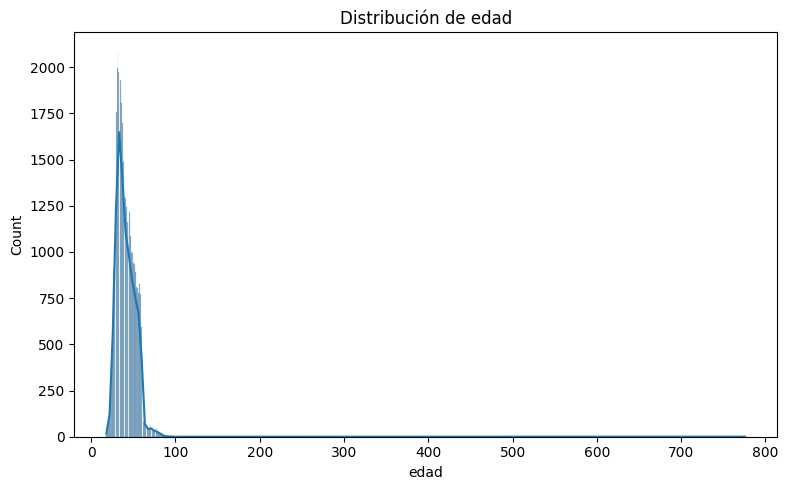


Análisis de la variable: trabajo
Distinct: 18 (0.04%)
Missing: 2 (0.00%)
Infinite: 0 (0.00%)


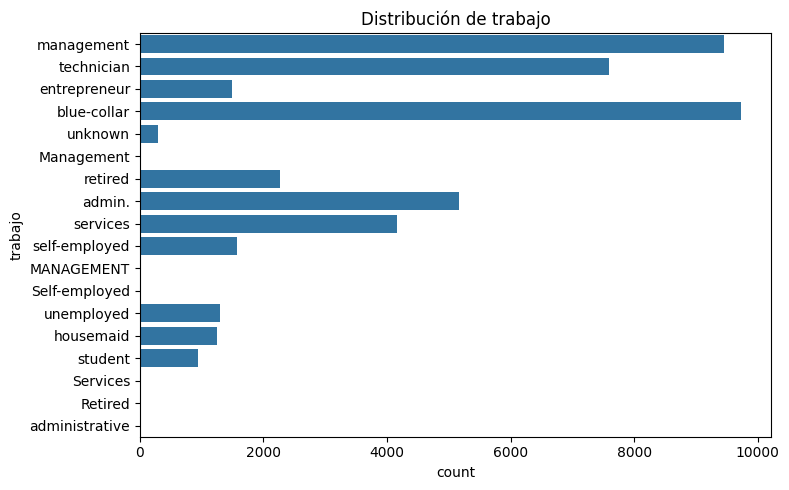


Análisis de la variable: estado_civil
Distinct: 6 (0.01%)
Missing: 1 (0.00%)
Infinite: 0 (0.00%)


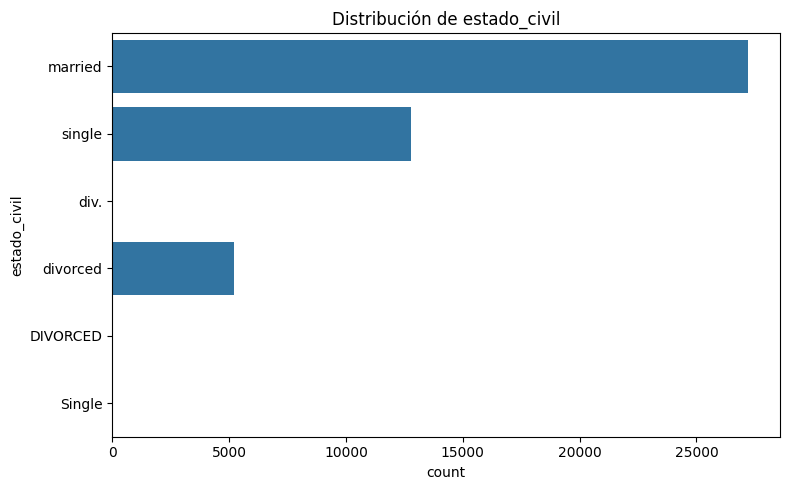


Análisis de la variable: educacion
Distinct: 10 (0.02%)
Missing: 1 (0.00%)
Infinite: 0 (0.00%)


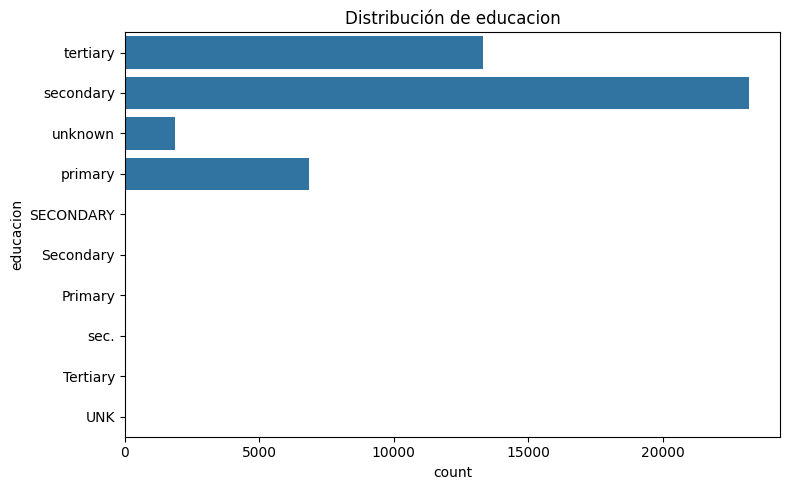


Análisis de la variable: incumplimiento
Distinct: 2 (0.00%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


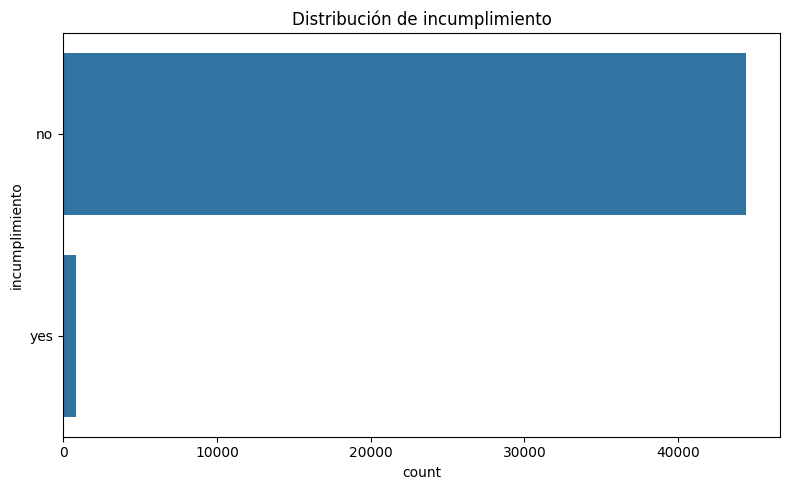


Análisis de la variable: saldo
Distinct: 7168 (15.85%)
Missing: 2 (0.00%)
Infinite: 0 (0.00%)
Minimum: -8019.0
Maximum: 527532.0
Zeros: 3514 (7.77%)
Negative: 3767 (8.33%)


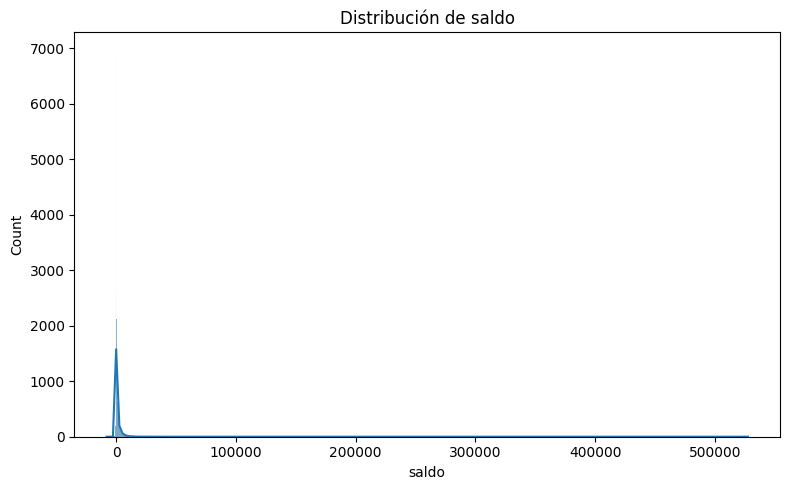


Análisis de la variable: vivienda
Distinct: 2 (0.00%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


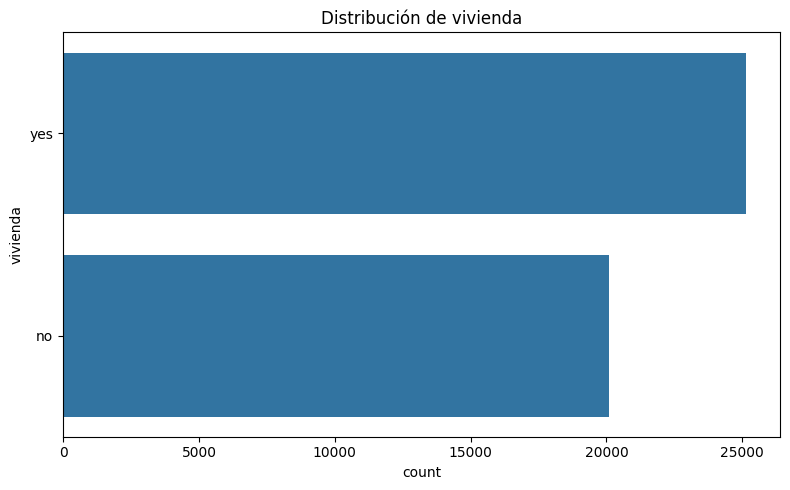


Análisis de la variable: prestamo
Distinct: 6 (0.01%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


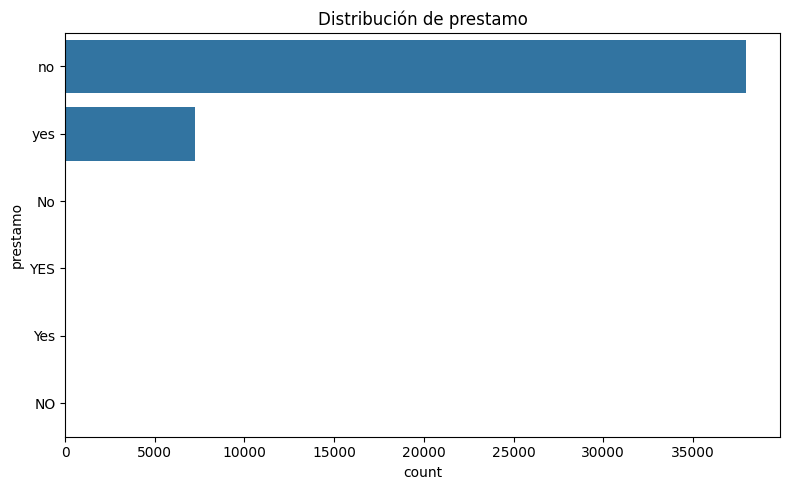


Análisis de la variable: contacto
Distinct: 5 (0.01%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


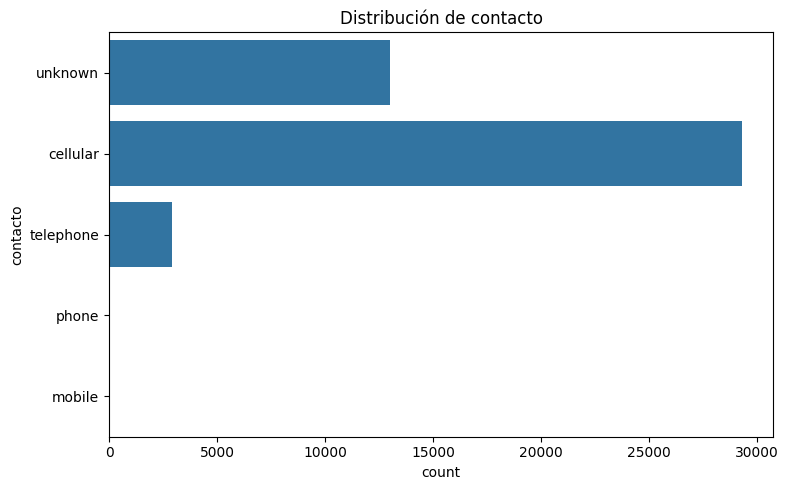


Análisis de la variable: dia
Distinct: 31 (0.07%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)
Minimum: 1
Maximum: 31
Zeros: 0 (0.00%)
Negative: 0 (0.00%)


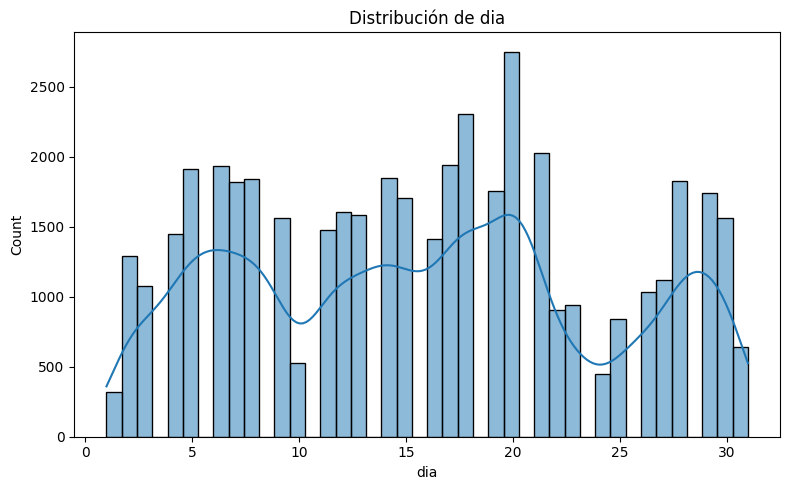


Análisis de la variable: mes
Distinct: 12 (0.03%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


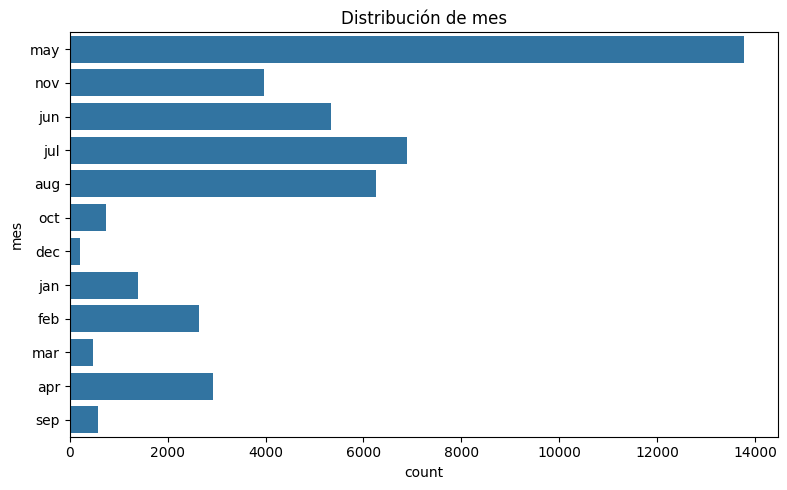


Análisis de la variable: duracion
Distinct: 1575 (3.48%)
Missing: 1 (0.00%)
Infinite: 0 (0.00%)
Minimum: -1389.0
Maximum: 4918.0
Zeros: 3 (0.01%)
Negative: 2 (0.00%)


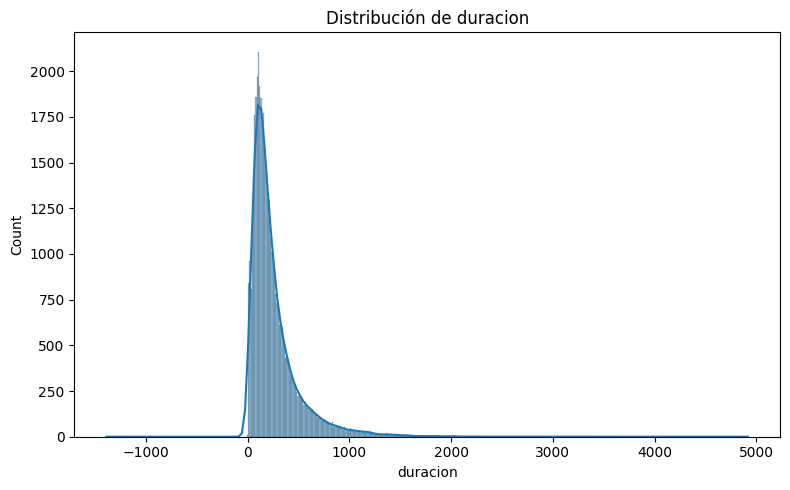


Análisis de la variable: campana
Distinct: 48 (0.11%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)
Minimum: 1
Maximum: 63
Zeros: 0 (0.00%)
Negative: 0 (0.00%)


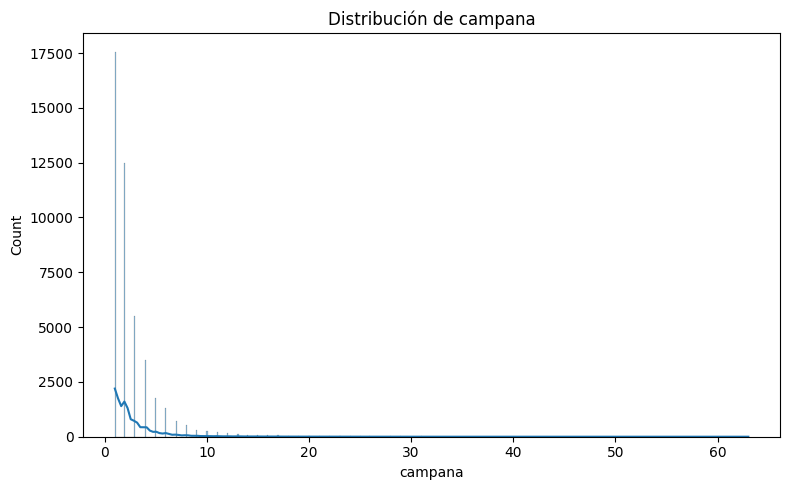


Análisis de la variable: dias_previos
Distinct: 559 (1.24%)
Missing: 1 (0.00%)
Infinite: 0 (0.00%)
Minimum: -1.0
Maximum: 871.0
Zeros: 0 (0.00%)
Negative: 36957 (81.74%)


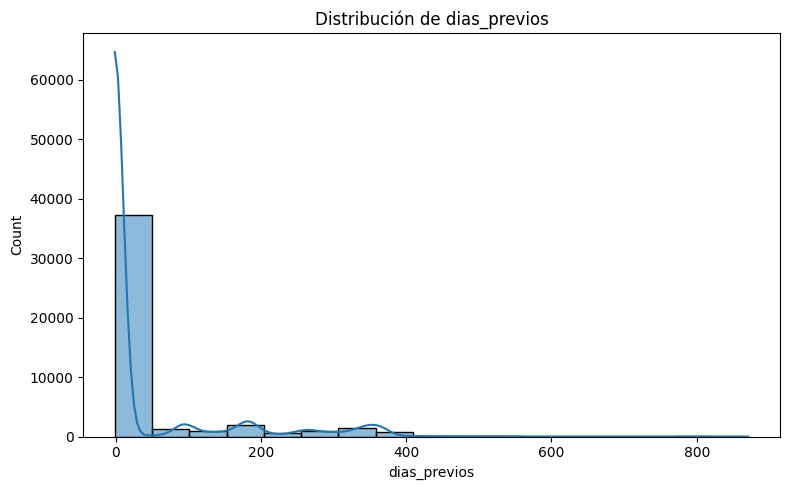


Análisis de la variable: anterior
Distinct: 41 (0.09%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)
Minimum: 0
Maximum: 275
Zeros: 36957 (81.74%)
Negative: 0 (0.00%)


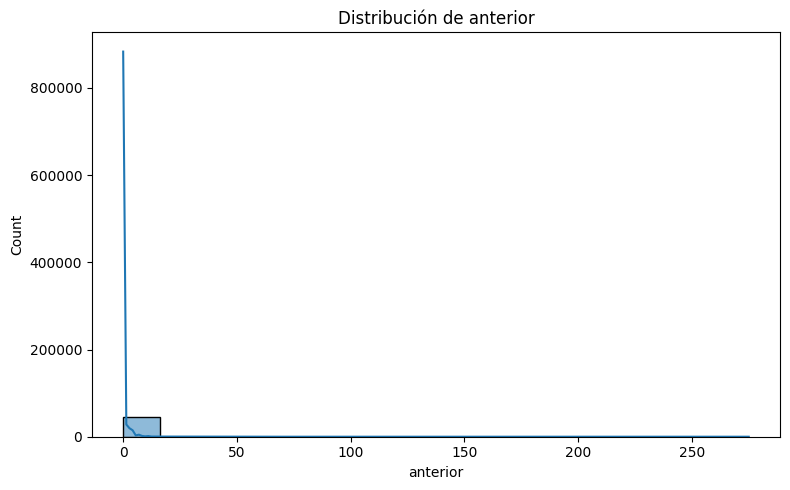


Análisis de la variable: resultado_prev
Distinct: 6 (0.01%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


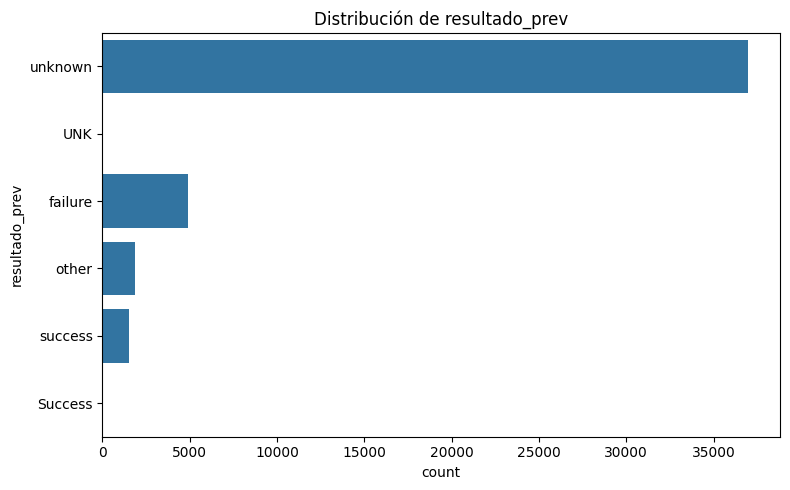


Análisis de la variable: target
Distinct: 2 (0.00%)
Missing: 0 (0.00%)
Infinite: 0 (0.00%)


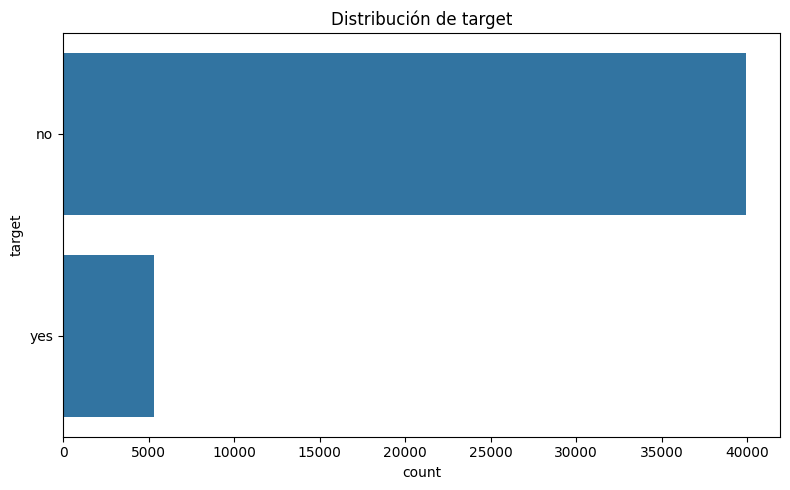

In [96]:
# 3. Análisis por variable
def variable_analysis(df):
    for col in df.columns:
        print(f"\nAnálisis de la variable: {col}")
        
        # Estadísticas generales
        n_distinct = df[col].nunique()
        n_missing = df[col].isnull().sum()
        n_infinite = np.isinf(df[col]).sum() if df[col].dtype in ['int64', 'float64'] else 0
        
        print(f"Distinct: {n_distinct} ({n_distinct/len(df)*100:.2f}%)")
        print(f"Missing: {n_missing} ({n_missing/len(df)*100:.2f}%)")
        print(f"Infinite: {n_infinite} ({n_infinite/len(df)*100:.2f}%)")
        
        if df[col].dtype in ['int64', 'float64']:
            print(f"Minimum: {df[col].min()}")
            print(f"Maximum: {df[col].max()}")
            n_zeros = (df[col] == 0).sum()
            n_negative = (df[col] < 0).sum()
            print(f"Zeros: {n_zeros} ({n_zeros/len(df)*100:.2f}%)")
            print(f"Negative: {n_negative} ({n_negative/len(df)*100:.2f}%)")
        
        # Gráfico de distribución
        plt.figure(figsize=(8, 5))
        if df[col].dtype in ['int64', 'float64']:
            sns.histplot(df[col], kde=True)
        else:
            sns.countplot(y=df[col])
        plt.title(f'Distribución de {col}')
        plt.tight_layout()
        plt.show()

variable_analysis(data)


Explicación del código:
Grafica la distribución de cada una de las columnas del dataframe e imprime un analisis de los datos en la columna según su tipo.

In [97]:
import pandas as pd
import numpy as np
from scipy import stats

def analisis_estadistico(data):
    resultados_numericos = []
    resultados_categoricos = []
    
    for columna in data.columns:
        if data[columna].dtype in ['int64', 'float64']:
            resultado = analisis_numerico(data[columna])
            resultados_numericos.append(resultado)
        elif data[columna].dtype == 'object':
            resultado = analisis_categorico(data[columna])
            resultados_categoricos.append(resultado)
    
    df_numericos = pd.DataFrame(resultados_numericos)
    df_categoricos = pd.DataFrame(resultados_categoricos)
    
    return df_numericos, df_categoricos

def analisis_numerico(serie):
    return {
        'Variable': serie.name,
        'Tipo': 'Numérica',
        'Mínimo': serie.min(),
        'Máximo': serie.max(),
        'Media': serie.mean(),
        'Mediana': serie.median(),
        'Desv. Estándar': serie.std(),
        'Q1': serie.quantile(0.25),
        'Q3': serie.quantile(0.75),
        'Rango intercuartil': serie.quantile(0.75) - serie.quantile(0.25),
        'Asimetría': stats.skew(serie),
        'Curtosis': stats.kurtosis(serie),
        'Valores únicos': serie.nunique(),
        'Valores nulos': serie.isnull().sum(),
        '% Valores nulos': (serie.isnull().sum() / len(serie)) * 100
    }

def analisis_categorico(serie):
    return {
        'Variable': serie.name,
        'Tipo': 'Categórica',
        'Valores únicos': serie.nunique(),
        'Moda': serie.mode().values[0] if not serie.mode().empty else None,
        'Frecuencia de moda': serie.value_counts().iloc[0] if not serie.value_counts().empty else 0,
        '% Frecuencia de moda': (serie.value_counts().iloc[0] / len(serie)) * 100 if not serie.value_counts().empty else 0,
        'Valores nulos': serie.isnull().sum(),
        '% Valores nulos': (serie.isnull().sum() / len(serie)) * 100,
        'Longitud máxima': serie.str.len().max(),
        'Longitud mínima': serie.str.len().min(),
        'Longitud media': serie.str.len().mean()
    }


df_numericos, df_categoricos = analisis_estadistico(data)

Explicación del código:
Con esta función se busca mostrar una estadistica descriptiva de las columnas teniendo en cuenta su tipo

### 2. Limpieza y transformación de los datos

In [98]:
print("Análisis de Variables Numéricas:")
df_numericos


Análisis de Variables Numéricas:


,Variable,Tipo,Mínimo,Máximo,Media,Mediana,Desv. Estándar,Q1,Q3,Rango intercuartil,Asimetría,Curtosis,Valores únicos,Valores nulos,% Valores nulos
0,edad,Numérica,18.0,776.0,41.004711,39.0,12.036647,33.0,48.0,15.0,10.247807,474.459031,85,0,0.000000
1,saldo,Numérica,-8019.0,527532.0,1374.159866,448.0,3924.255525,72.0,1428.0,1356.0,NaN,NaN,7168,2,0.004423
2,dia,Numérica,1.0,31.0,15.805839,16.0,8.322473,8.0,21.0,13.0,0.093153,-1.059869,31,0,0.000000
3,duracion,Numérica,-1389.0,4918.0,258.074357,180.0,257.605175,103.0,319.0,216.0,NaN,NaN,1575,1,0.002212
4,campana,Numérica,1.0,63.0,2.763729,2.0,3.097910,1.0,3.0,2.0,4.898679,39.248188,48,0,0.000000
5,dias_previos,Numérica,-1.0,871.0,40.192485,-1.0,100.120622,-1.0,-1.0,0.0,NaN,NaN,559,1,0.002212
6,anterior,Numérica,0.0,275.0,0.580383,0.0,2.303438,0.0,0.0,0.0,41.841620,4505.984718,41,0,0.000000


## Conclusiones:

- Rango de edades:

    * La edad de los clientes varía desde 18 hasta 776 años, con una media de 41 años.
    * El valor máximo de 776 años parece ser un error en los datos, ya que no es una edad realista.


- Saldo bancario:

    * Hay una gran variabilidad en los saldos, desde -8019 hasta 527532.
    * La media (1374.15) es significativamente mayor que la mediana (448), lo que sugiere una distribución sesgada hacia valores altos.
    * Hay 2 valores nulos en esta variable.

- Duración:

    * Varía desde -1389 a 4918.
    * El valor negativo mínimo sugiere un posible error en los datos.

- Campaña:

    *  Tiene un rango de 1 a 63, con una media de 2.76.

- Días previos:

    * Tiene un rango amplio de -1 a 871 días.

- Anterior:

    *  Varía de 0 a 275, con una media muy baja de 0.58.

- Valores nulos:

    *  La mayoría de las variables no tienen valores nulos, excepto 'saldo' (2 nulos), 'duracion' (1 nulo), y 'dias_previos' (1 nulo).

- Asimetría y curtosis:

    *  Varias variables muestran asimetría significativa, especialmente 'anterior' con una asimetría muy alta de 41.84.
    *  Algunas variables tienen curtosis extremadamente alta, como 'anterior' con 4505.98, indicando distribuciones muy puntiagudas.

- Valores únicos:

    * 'saldo' tiene la mayor cantidad de valores únicos (7168), sugiriendo una gran variabilidad.

In [99]:
print("\nAnálisis de Variables Categóricas:")
df_categoricos


Análisis de Variables Categóricas:


,Variable,Tipo,Valores únicos,Moda,Frecuencia de moda,% Frecuencia de moda,Valores nulos,% Valores nulos,Longitud máxima,Longitud mínima,Longitud media
0,trabajo,Categórica,18,blue-collar,9731,21.521619,2,0.004423,14.0,6.0,9.486077
1,estado_civil,Categórica,6,married,27215,60.190202,1,0.002212,8.0,4.0,6.831667
2,educacion,Categórica,10,secondary,23197,51.303771,1,0.002212,9.0,3.0,8.320188
3,incumplimiento,Categórica,2,no,44399,98.195289,0,0.000000,3.0,2.0,2.018047
4,vivienda,Categórica,2,yes,25132,55.583324,0,0.000000,3.0,2.0,2.555833
5,prestamo,Categórica,6,no,37962,83.958863,0,0.000000,3.0,2.0,2.160257
6,contacto,Categórica,5,cellular,29285,64.768329,0,0.000000,9.0,5.0,7.775893
7,mes,Categórica,12,may,13768,30.450072,0,0.000000,3.0,3.0,3.000000
8,resultado_prev,Categórica,6,unknown,36958,81.738361,0,0.000000,7.0,3.0,6.918257
9,target,Categórica,2,no,39925,88.300343,0,0.000000,3.0,2.0,2.116997


Conclusiones:
* Trabajo: 
  * Hay 18 categorías diferentes de trabajo.
  * La categoría más común es "blue-collar", representando el 21.52% de los casos.
* Estado civil: 
  * Existen 6 categorías de estado civil.
  * La categoría más frecuente es "married" (casado), con un 60.19% de los casos.
* Educación: 
  * Hay 10 niveles educativos diferentes.
  * El nivel más común es "secondary" (secundaria), que representa el 51.30% de los casos.
* Incumplimiento: 
  * Es una variable binaria (2 categorías).
  * La gran mayoría (98.20%) no tiene incumplimientos ("no").
* Vivienda: 
  * También es una variable binaria.
  * El 55.58% tiene vivienda ("yes").
* Préstamo: 
  * Otra variable binaria.
  * La mayoría (83.96%) no tiene préstamo ("no").
* Contacto: 
  * Hay 5 tipos de contacto.
  * El método más común es "cellular" (celular), usado en el 64.77% de los casos.
* Mes: 
  * Registra 12 meses, lo que sugiere que los datos cubren un año completo.
  * Mayo ("may") es el mes con más frecuencia, representando el 30.45% de los contactos.
* Resultado previo: 
  * Tiene 6 categorías diferentes.
  * La mayoría (81.74%) se clasifica como "unknown" (desconocido).
* Target: 
  * Es una variable binaria, identificada como la variable objetivo.
  * La mayoría (88.30%) está clasificada como "no".
* Valores nulos: 
  * La mayoría de las variables categóricas no tienen valores nulos.
  * Solo "trabajo" y "estado_civil" tienen algunos valores nulos (2 y 1 respectivamente).
* Longitud de los datos: 
  * La variable "trabajo" tiene la mayor longitud máxima (14 caracteres) y la mayor longitud media (9.49 caracteres).
  * Varias variables tienen una longitud mínima de 2 o 3 caracteres.






In [100]:
#elimino los valores faltantes de mi dataframe
data.dropna(inplace=True)

#conteo de valores por columna de mi dataframe
data.count()

edad              45207
trabajo           45207
estado_civil      45207
educacion         45207
incumplimiento    45207
saldo             45207
vivienda          45207
prestamo          45207
contacto          45207
dia               45207
mes               45207
duracion          45207
campana           45207
dias_previos      45207
anterior          45207
resultado_prev    45207
target            45207
dtype: int64

Explicación del código:
Se eliminan las filas con datos faltantes y luego imprime el conteno de datos por columna

In [101]:
# Eliminar filas con "edad">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45207, 17)
Tamaño del set después de eliminar registros de edad: (45199, 17)


In [102]:

# Eliminar filas con "duracion"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index)
#data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45199, 17)
Tamaño del set después de eliminar registros de duración: (45197, 17)


Explicación del código:
Se eliminan outlier observados en el analisis descriptivos de las variables edad, duracion

In [103]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45197, 17)
Tamaño del set después de eliminar las filas repetidas: (45193, 17)


Explicación del código:
Se eliminan datos duplicados del dataframe

In [104]:
import pandas as pd

def limpiar_unificar_categorias(data):
    """
    Limpia y unifica categorías en varias columnas del DataFrame.
    Primero convierte todas las categorías a minúsculas y luego aplica reglas específicas.
    
    :param data: DataFrame de pandas con los datos a limpiar
    :return: DataFrame con las categorías limpiadas y unificadas
    """
    # Copia del DataFrame para no modificar el original
    df = data.copy()
    
    # Convertir todas las columnas categóricas a minúsculas
    for columna in df.select_dtypes(include=['object']).columns:
        df[columna] = df[columna].str.lower()
    
    # Diccionario con las columnas y sus respectivas reglas de limpieza
    reglas_limpieza = {
        'trabajo': {'admin.': 'administrative'},
        'estado_civil': {'div.': 'divorced'},
        'educacion': {'sec.': 'secondary', 'unk': 'unknown'},
        'contacto': {'phone': 'telephone', 'mobile': 'cellular'},
        'resultado_prev': {'unk': 'unknown'}
    }
    
    # Aplicar las reglas de limpieza
    for columna, reglas in reglas_limpieza.items():
        if columna in df.columns:

            # Crear un diccionario de reemplazo
            reemplazo = {viejo.lower(): nuevo.lower() for viejo, nuevo in reglas.items()}
            
            # Aplicar reemplazos
            df[columna] = df[columna].replace(reemplazo)
            
            print("Valores únicos después de la limpieza:", df[columna].unique())
        else:
            print(f"La columna {columna} no existe en el DataFrame.")
    
    return df

# Aplicamos la función de limpieza
data_limpia = limpiar_unificar_categorias(data)



Valores únicos después de la limpieza: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
Valores únicos después de la limpieza: ['married' 'single' 'divorced']
Valores únicos después de la limpieza: ['tertiary' 'secondary' 'unknown' 'primary']
Valores únicos después de la limpieza: ['unknown' 'cellular' 'telephone']
Valores únicos después de la limpieza: ['unknown' 'failure' 'other' 'success']


Explicación del código:
Con la función se hace la limpieza de unificar nombre de categorias, en cada columna y convertir todo a minuscula

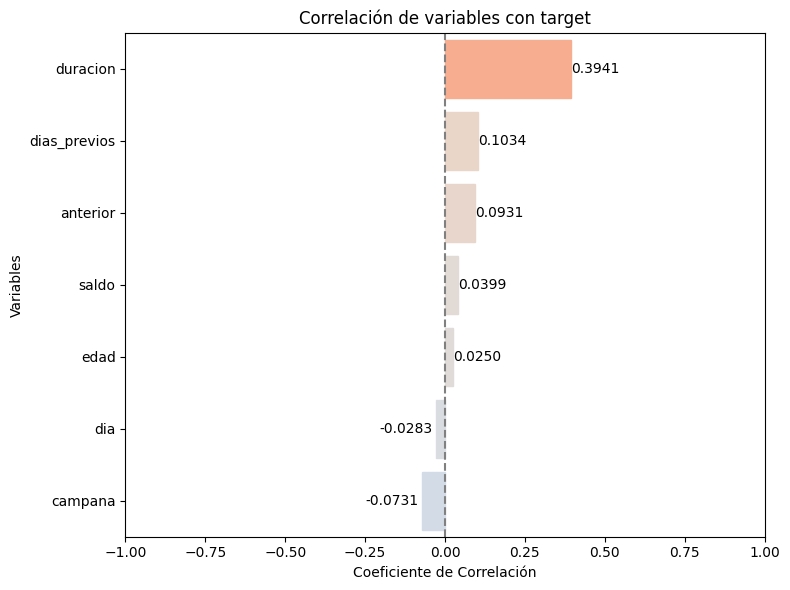

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def grafico_correlacion_respuesta(data, variable_respuesta):
    """
    Crea un gráfico de correlación entre todas las variables numéricas y la variable respuesta,
    excluyendo la variable respuesta de la lista de correlaciones.
    Si la variable respuesta es categórica (yes/no), la convierte a numérica (1/0).
    Muestra los valores de correlación en las barras del gráfico.
    
    :param data: DataFrame de pandas con los datos
    :param variable_respuesta: Nombre de la columna que contiene la variable respuesta
    """
    df = data.copy()

    if df[variable_respuesta].dtype == 'object':
        df[variable_respuesta] = df[variable_respuesta].map({'yes': 1, 'no': 0})
    
    # Seleccionar solo las variables numéricas, excluyendo la variable respuesta
    numeric_data = df.select_dtypes(include=[np.number]).drop(columns=[variable_respuesta])
    correlaciones = numeric_data.apply(lambda x: x.corr(df[variable_respuesta]))

    correlaciones_ordenadas = correlaciones.sort_values(ascending=False)

    df_corr = pd.DataFrame({'Variable': correlaciones_ordenadas.index, 'Correlación': correlaciones_ordenadas.values})

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='Correlación', y='Variable', data=df_corr, hue='Variable', dodge=False, legend=False)

    for i, bar in enumerate(ax.patches):
        bar.set_color(plt.cm.coolwarm(df_corr['Correlación'].iloc[i] / 2 + 0.5))
        width = bar.get_width()
        ax.text(width if width >= 0 else width - 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f'{df_corr["Correlación"].iloc[i]:.4f}', 
                ha='left' if width >= 0 else 'right', 
                va='center',
                # fontweight='bold'
                )
    plt.xlim(-1, 1)
    
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.title(f'Correlación de variables con {variable_respuesta}')
    plt.xlabel('Coeficiente de Correlación')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()
    
    return df_corr

# Ejemplo de uso

resultado_correlacion = grafico_correlacion_respuesta(data_limpia, 'target')


Explicación del código:
Creación del gráfico de correlación de las variables numéricas con la variable respuesta.

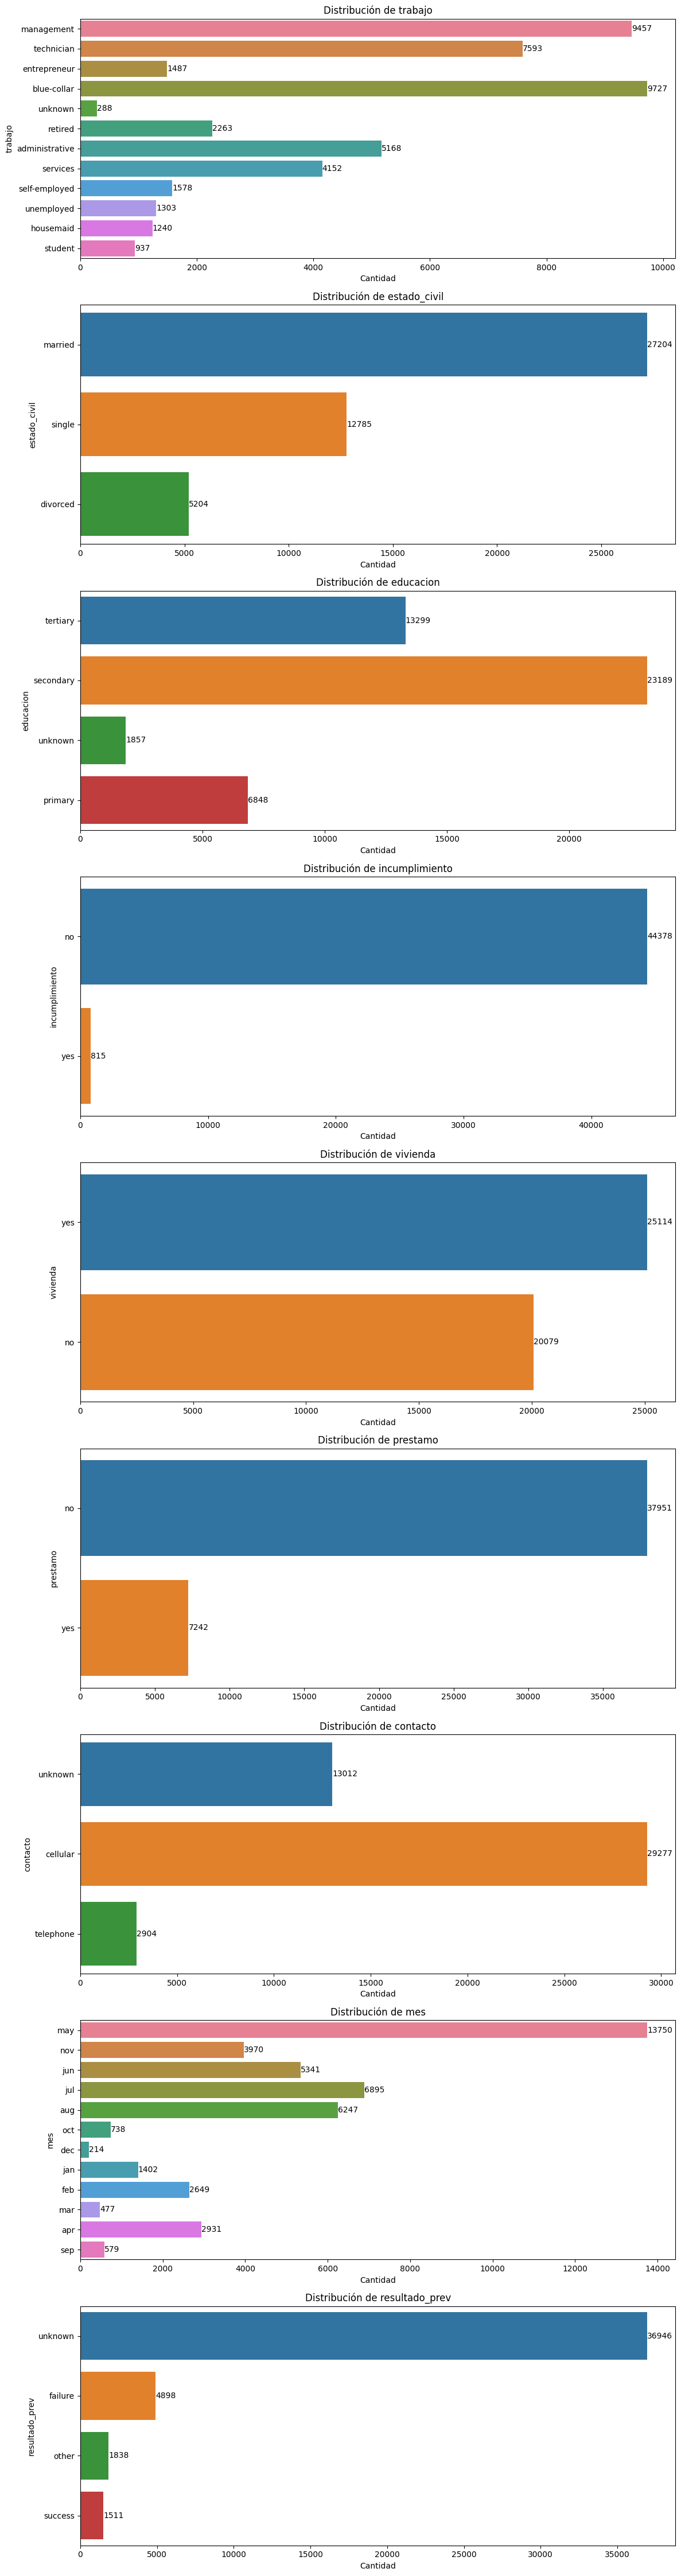

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols_cat = ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']

cols_existentes = [col for col in cols_cat if col in data_limpia.columns]

fig, axs = plt.subplots(nrows=len(cols_existentes), ncols=1, figsize=(12, 5*len(cols_existentes)))
fig.subplots_adjust(hspace=0.5)

if len(cols_existentes) == 1:
    axs = [axs]

for i, col in enumerate(cols_existentes):
    sns.countplot(y=col,hue=col, data=data_limpia, ax=axs[i])

    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel('Cantidad')
    axs[i].set_ylabel(col)

    for container in axs[i].containers:
        axs[i].bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

Explicación del código:
Muestra la distribución de las variables

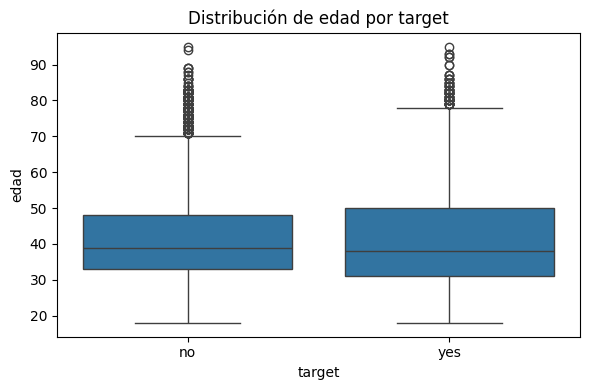

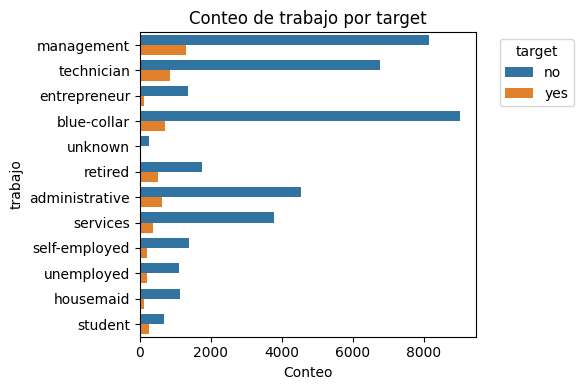

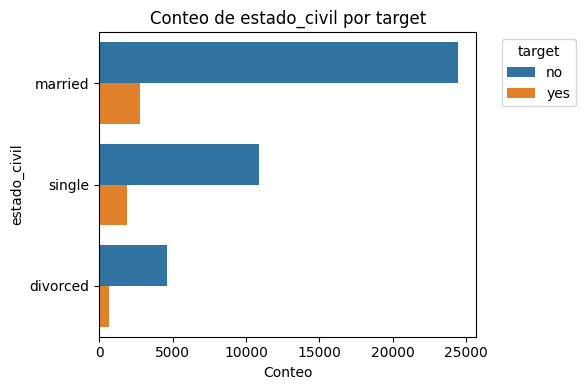

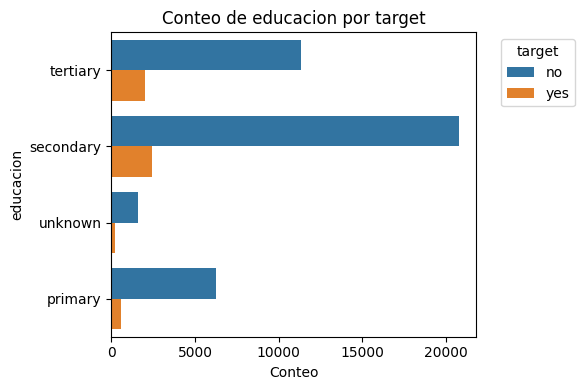

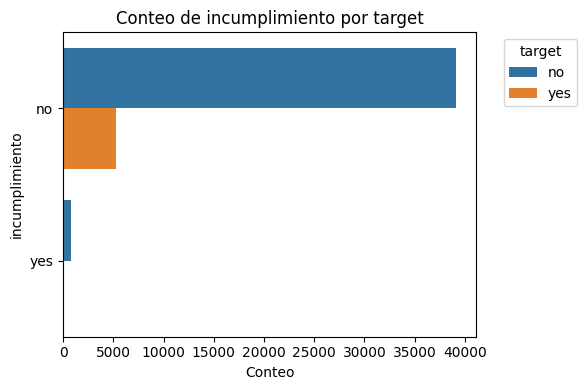

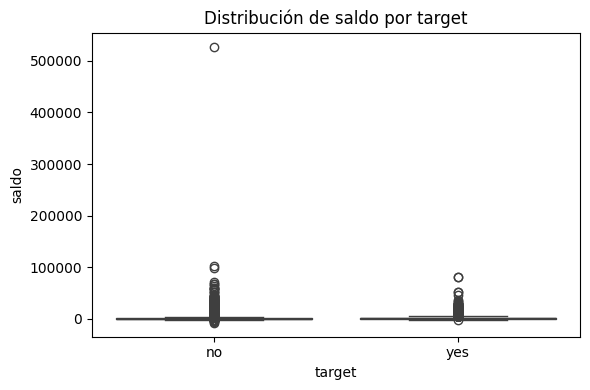

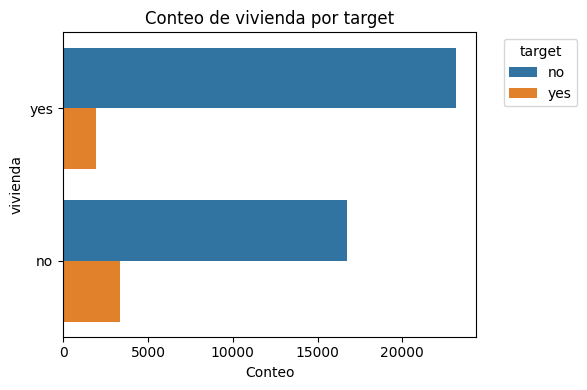

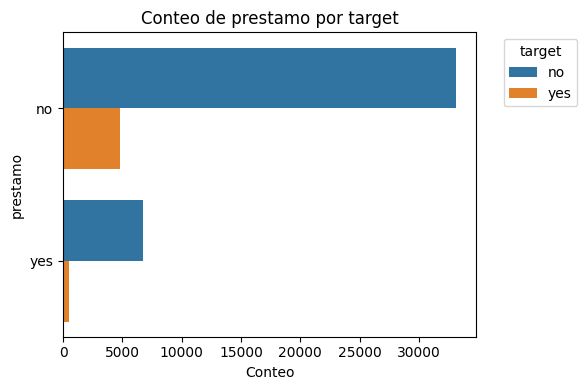

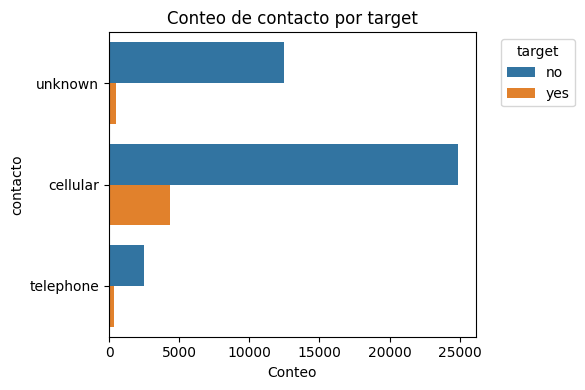

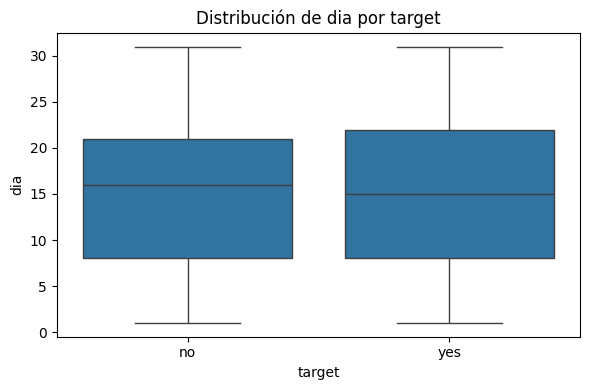

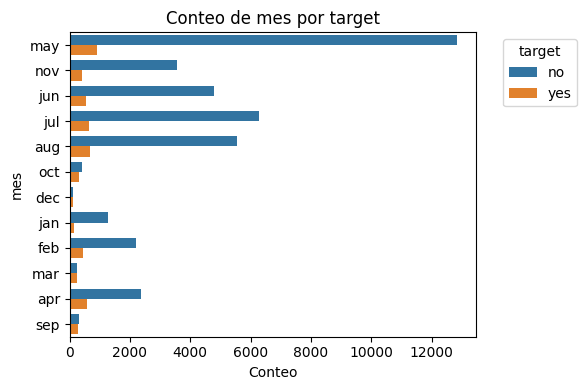

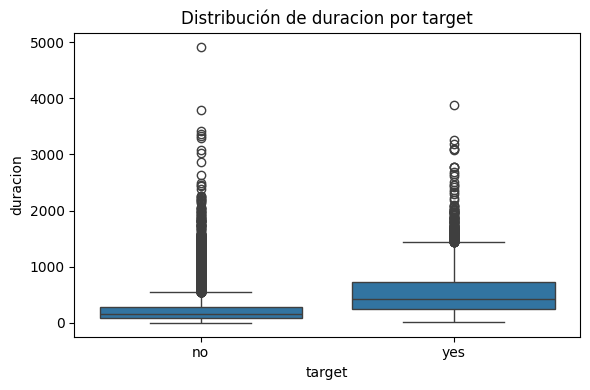

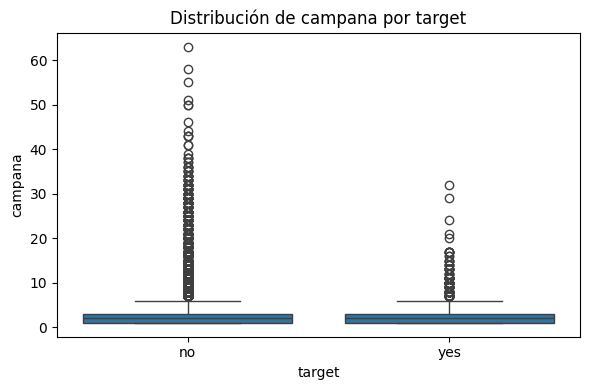

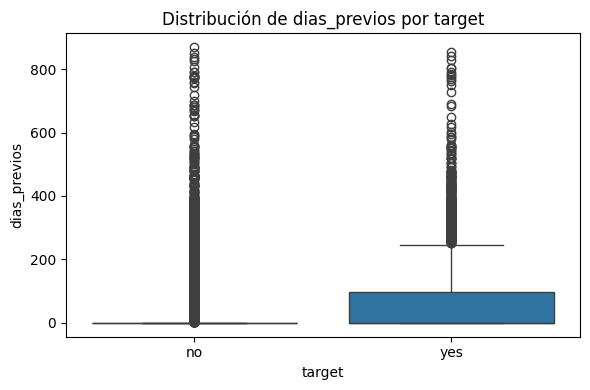

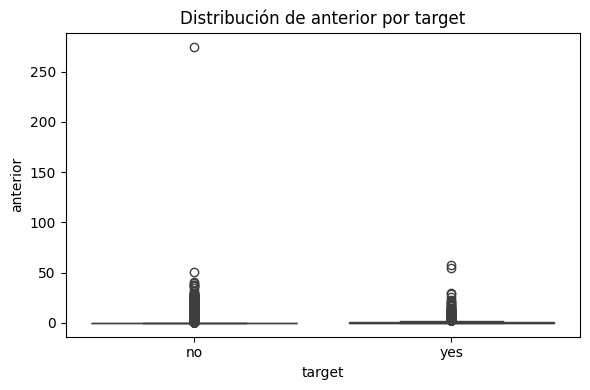

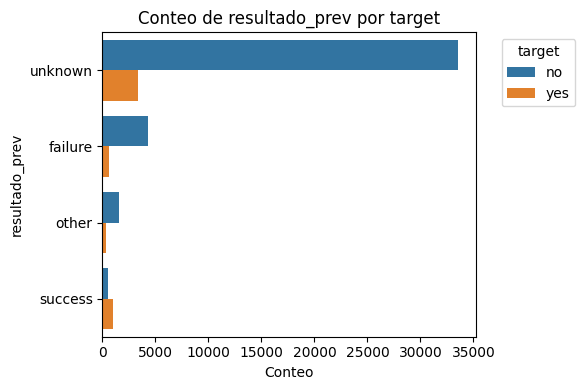

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_vs_target(df, target='target'):
    """
    Crea gráficos para mostrar el comportamiento de cada variable con respecto a la variable objetivo.
    Para variables numéricas, usa boxplots.
    Para variables categóricas, usa countplots verticales.
    
    :param df: DataFrame de pandas con los datos
    :param target: Nombre de la columna que contiene la variable objetivo
    """
    for col in df.columns:
        if col != target:
            plt.figure(figsize=(6, 4))
            if df[col].dtype in ['int64', 'float64']:
                sns.boxplot(x=target, y=col, data=df)
                plt.title(f'Distribución de {col} por {target}')
                plt.xlabel(target)
                plt.ylabel(col)
            else:
                # Gráfico de barras vertical para variables categóricas
                ax = sns.countplot(y=col, hue=target, data=df)
                plt.title(f'Conteo de {col} por {target}')
                plt.xlabel('Conteo')
                plt.ylabel(col)
                
                # # Añadir etiquetas de conteo en las barras
                # for container in ax.containers:
                #     ax.bar_label(container, label_type='center')
                
                # Ajustar el diseño para evitar superposiciones
                plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')
            
            plt.tight_layout()
            plt.show()


# Aplicamos la función
plot_vs_target(data_limpia)

Explicación del código:
Muestra el comportamiento de las variables con respecto a la variables objetivo.

In [113]:
#Edad(age) promedio(mean) de los clientes interesados en adquirir un certificado de depósito(y)
edad_promedio_interesados = data[data['target'] == 'yes']['edad'].mean()
print("1. Edad promedio de los clientes interesados:", edad_promedio_interesados)

1. Edad promedio de los clientes interesados: 41.665468306527906


Explicación del código:
Cálcula el promedio de de la edad de las personas interesadas